<a href="https://colab.research.google.com/github/pleunipennings/CSC508_ML_Biomedicine_Class/blob/main/Module_3a_Random_Forest_Cleveland_dataset_CSC508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Welcome to the module 3a coding part: Random Forest!**

*This notebook was originally created at San Francisco State University (SFSU) by Vaisakh Kusabhadran, Amisha Dhawan, Yuomi Zavaleta (all SFSU students) and Pleuni Pennings (SFSU bio professor).* 

*This notebook was edited for the Promoting INclusivity and Computing (PINC) and gSTAR programs by Dr. Pleuni Pennings, Lucy Moctezuma Tan and Lorena Benitez-Rivera (master students) all members of the COde to understand Drug resistance Evolution (CODE) lab at SFSU in 2023.*

#OBJECTIVE OF THIS NOTEBOOK:

In this notebook we will revisit the Cleaveland heart disease dataset, this time we will use a **Random Forest** to make our predictions rather than just using a single Decision Tree. Below is a summary of the variables that this dataset contains.

<ul type = "square">
<li> [1] #3 Age: age in years</li>
<li> [2] #4 Sex: sex (1 = male; 0 = female)</li>
<li> [3] #9 Chest_pain_type
<ul>
<li>Value 1: typical angina
<li>Value 2: atypical angina
<li>Value 3: non-anginal pain
<li>Value 4: asymptomatic</li>
</ul>
<li> [4] #10 At_rest_bp: resting blood pressure (in mm Hg on admission to the hospital)</li>
<li> [5] #12 Cholesterol: serum cholestoral in mg/dl </li>
<li> [6] #16 Fast_blood_sug: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
<li> [7] #19 Rest_ecg: resting electrocardiographic results
<ul>
<li>Value 0: normal
<li>Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
<li>Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria</li>
</ul>
<li> [8] #32 Maxhr: thalach: maximum heart rate achieved</li>
<li> [9] #38 Exer_angina: exang: exercise induced angina (1 = yes; 0 = no)</li>
<li> [10] #40 Oldpeak: ST depression induced by exercise relative to rest </li>
<li> [11] #41 Slope: the slope of the peak exercise ST segment
<ul>
<li> Value 1: upsloping</li>
<li> Value 2: flat</li>
<li> Value 3: downsloping</li>
</ul>
<li> [12] #44 Ca: number of major vessels (0-3) colored by flourosopy</li>
<li> [13] #51 Thal: Thallium or stress test 3 = normal; 6 = fixed defect; 7 = reversable defect. See this
<a href="https://www.healthline.com/health/thallium-stress-test">website</a>
for more info on the thallium or stress test.
</li>
<li> [14] #58 Diag: num: diagnosis of heart disease (angiographic disease status)
<ul>
<li>Value 0: no vessel with 50% diameter narrowing</li>
<li>Value 1: one vessel with 50% diameter narrowing</li>
<li>Value 2,3,4: 2,3,4 vessels with 50% diameter narrowing</li>
</ul>
</li>
</ul>

The **goal** of this notebook is to work with a random forest model. 

Your mission is to run each cell, see what happens, and answer some questions based on the code. 

# Let's look at the Cleveland dataset again using a **Random Forest model**. 

#WHAT ARE RANDOM FOREST?

In this notebook you will make a random forest. A random forest is a collection of random-ish decision trees. This model essentially combines the output of multiple decision trees to reach a particular prediction. Most jargon in Machine Learning is just ugly, imo. But Random Forest sounds nice to me, a little poetic. If I were a singer-songwriter, I could imagine titling my album after random forests.  

![PleunismusicAlbum.png](https://drive.google.com/uc?export=view&id=1-CtmRWaxAVuq8twD_rx6-qxS2kUJ1z0U)

You can find more information about Random Forest here: [Scikit-learn: Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

### **Task 1:** Exploring the data (Questions 1-4)

##**Step 1) Preparing packages**

Importing all the necessary packages needed for processing

In [1]:
# Importing packages that deal with Data manipulation and visualization
import pandas as pd
import numpy as np

# importing libraries for ML model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

##**Step 2) Importing Cleveland dataset**

Reading the dataset from the github repository

In [2]:
# Loading Data from Class github
columns = ["Age","Sex","Chest_pain_type","At_rest_bp","Cholesterol","Fast_blood_sug","Rest_ecg","Maxhr","Exer_angina","Oldpeak","Slope","Ca","Thal","Diag"]
cleveland_data = pd.read_csv('https://raw.githubusercontent.com/pleunipennings/CSC508Data/main/processed.cleveland.data.txt',header=None,names=columns )

cleveland_data.head()

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak,Slope,Ca,Thal,Diag
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


##**Step 3) Dealing with missing data**

Replacing '?' in the dataset with the median value for that column. 

In [3]:
# dealing with missing values
cleveland_data = cleveland_data.replace('?', np.nan)
cleveland_data['Thal'] = cleveland_data['Thal'].fillna(cleveland_data['Thal'].median())
cleveland_data['Ca'] = cleveland_data['Ca'].fillna(cleveland_data['Ca'].median())

# checking number of missing values afterwards 
(cleveland_data==np.nan).sum()

Age                0
Sex                0
Chest_pain_type    0
At_rest_bp         0
Cholesterol        0
Fast_blood_sug     0
Rest_ecg           0
Maxhr              0
Exer_angina        0
Oldpeak            0
Slope              0
Ca                 0
Thal               0
Diag               0
dtype: int64

In [4]:
# Checking the dimensions of the dataset
print("The dimension of the table is:",cleveland_data.shape)

The dimension of the table is: (303, 14)


##**Step 4) Splitting target and features**

Separating out the target (label) which is what we want to predict, the "Diag" column from the rest of the dataset (the features). 

Converting the labels to binary values so that the model is trained just to predict the presence/absence of heart disease. 

In [5]:
# Converting the label into a binary variable 
labels = np.array(cleveland_data["Diag"])
labels = np.where(labels >= 1,1,0)
labels

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

###**Question 1:** 

What does 0 and 1 represent in this array?

**Question 1 answer:**

Dropping the label from the dataset. Now since the label has got removed, we can use this dataset to train the model

In [6]:
# Isolating the features Dataset
features = cleveland_data.drop(columns='Diag')
features

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak,Slope,Ca,Thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


###**Question 2:** 

What do you think it could happen if we don't drop the target or the label column?

**Question 2 answer:**

Converting the dataframe into an Numpy array as the algorithm requires a Numpy array for processing

In [7]:
# Converting the features dataset into an array
features_arr = np.array(features)

##**Step 5) Separating train and test data**

* **test_size = 0.25** Gives the propotion of the dataset to include in the test set. 0.25 represents 25%. <br>
* **random_state = 1** Random state ensures that the splits that you generate are reproducible. 

Scikit-learn uses random permutations to generate the splits. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order. More details - [Scikit-learn: Random numbers](https://scikit-learn.org/stable/glossary.html#term-random_state)

###**Question 3:** 

For the decision tree model, we used random_state = 2. Here we are using 1 only, do you think that would make a big difference, why or why not?

**Question 3 answer:**

In [8]:
# Making 4 groups for training and testing purposes
train_features, test_features, train_labels, test_labels = train_test_split(features_arr, labels, test_size = 0.25, random_state = 42)


###**Question 4:** 

What percentage of the data is used for training?

**Question 4 answer:**

In [9]:
# looking at the training data labels
print("Number of people without Heart Disease: ",np.bincount(train_labels)[0])
print("Number of people with Heart Disease: ",np.bincount(train_labels)[1])

Number of people without Heart Disease:  125
Number of people with Heart Disease:  102


In [10]:
# looking at the testing data labels
print("Number of people without Heart Disease: ",np.bincount(test_labels)[0])
print("Number of people with Heart Disease: ",np.bincount(test_labels)[1])

Number of people without Heart Disease:  39
Number of people with Heart Disease:  37


### **Task 2:** Undestanding the Random Forest model (Questions 5-7)

###**Question 5:** 

Do some google search, what is the difference between random forest classifier and random forest regressor, which one is the most used? 

**Question 5 answer:**

###**Question 6:** 

In this notebook, are we using random forest classifier or random forest regressor, how do you know?

**Question 6 answer:**

## **Step 6) Making the random forest tree and making predictions with it**

Training the model using test set. 
You will see here that actually training the model is super easy and fast. 

We just need to decide how many random trees we'll make, we use:

**random state = 42** so that we can all get exactly the same results, but if you change the random state, you'll get slightly different results. It's called random for a reason!  

In [11]:
# Create and fit Random Forest Trees
rf = RandomForestClassifier(n_estimators = 1000, max_features = 'sqrt', bootstrap = True, random_state = 42)
rf.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=1000, random_state=42)

There are **1000 trees** that have been created in the code above, This means that we can actually checkout a single decision tree. Since python starts counts from 0. In the code below try changing the index to any value from [0, 999] so that you can see exactly how each of the decision tree looks like!

### **Question 7**  
Try using index [1] and then index [2] in the code below. You can change the index in the first argument of the function tree.export_graphiz(rf.estimators_[index]). Are the root nodes different for these trees? Why do you think the root nodes are different for those trees?


**Question 7 answer:**

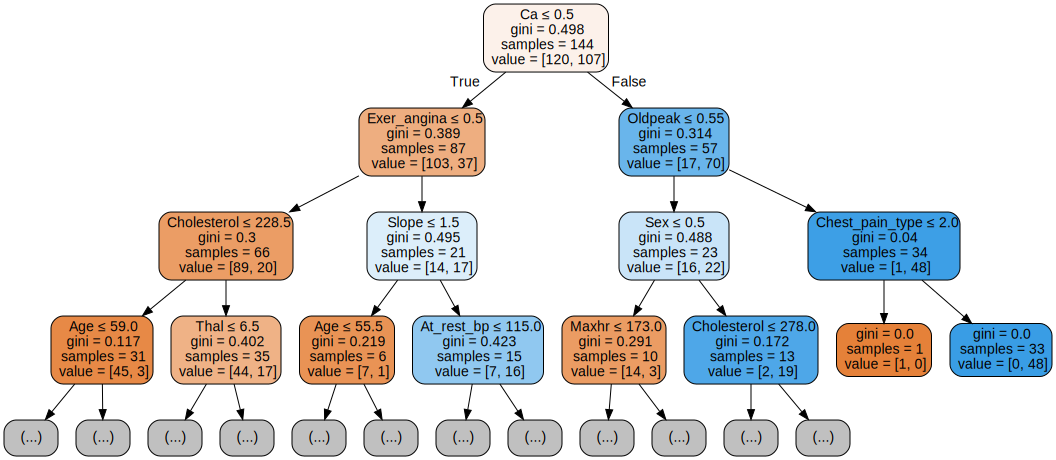

In [ ]:
# looking at a single Decision tree inside the random forest
single_tree = tree.export_graphviz(rf.estimators_[1], out_file=None, 
                                  feature_names=features.columns,  
                                  filled=True, rounded=True,  
                                  special_characters=True,
                                  max_depth= 3)
graph = graphviz.Source(single_tree)
graph.render("Classification tree")
display(graph)

## **Step 7) Looking at the results and looking at the accuracy of the model**

Now that we have seen that our random forest is made out of many trees! lets look at how our random forest chooses its final prediction based on this fact. The code below uses a single row (the second row) from our test data and runs it through each of the trees of our forest.

In [12]:
# Code below shows the number of trees that predicted one of the two outcomes
votes_for_healthy = 0 #we start with 0 trees "voting" for healthy
votes_for_heart_disease = 0 #and 0 trees "voting" for heart-disease
for i in range(0,len(rf)): #loop over each of the trees in the random forest
  pred = rf.estimators_[i].predict(test_features[[1]]) #get a prediction from one tree
  if pred == 1.00: #if the prediction is "1" that's a vote for heart disease
    votes_for_heart_disease = votes_for_heart_disease + 1 
  else: #if the prediction is "0" that's a vote for healthy
    votes_for_healthy = votes_for_healthy + 1

print("Number of trees that predicted Healthy: ",votes_for_healthy)
print("Number of trees that predicted Heart Disease: ",votes_for_heart_disease)

Number of trees that predicted Healthy:  254
Number of trees that predicted Heart Disease:  746


Based on the fact that most of our trees have chosen **"Heart Disease" [1]** over **"Healthy" [0]**, what do you think our random forest would predict? Let's see what our random forest would predict for the second row of our test data.

In [13]:
# prediction using the second value of our test features
pred = rf.predict(test_features[[1]])
print("Prediction by the entire random forest: ", pred)

Prediction by the entire random forest:  [1]


Now that we have seen a bit under the hood of how our random forest makes it's final prediction, let's make all our predictions for all our test data to see the accuracy of our model.

In [14]:
# Predictions made for all the test data features
predictions = rf.predict(test_features)
predictions

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1])

We use the confusion matrix to visualize how well our model did. 

### **Task 3:** Testing accuracy (Questions 8-11)

[[34  5]
 [ 6 31]]


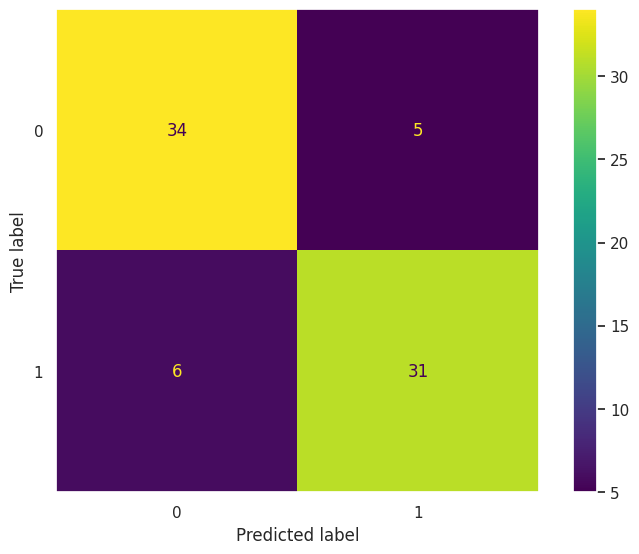

In [15]:
# Creating a Confusion matrix for our results
sns.set(rc={'figure.figsize':(8.7,6.27)})
print(metrics.confusion_matrix(test_labels, predictions))
plt1 = metrics.ConfusionMatrixDisplay.from_estimator(rf, test_features, test_labels)
plt.grid(visible=None)

### **Question 8**

What did you get for: True Positive (TP), True Negative (TN), False Positive (FP) and False Negative (FN)?

**Question 8 answer:**

In [16]:
# calculating the accuracy
acc = round(100*metrics.accuracy_score(predictions, test_labels),2)
print("Accuracy:",acc,"%")

Accuracy: 85.53 %


### **Question 9**

How does the accuracy of the random forest classifier compare to the decision tree? 
If you only made 2 random trees in your random forest, would that change your accuracy? Try it out and report here. 

In [ ]:
#Code line to answer question 9

**Question 9 answer:**

### **Question 10**

How does the accuracy of the random forest classifier compare to the decision tree? 
If you only made 4 random trees in your random forest, would that change your accuracy? Try it out and report here. 

In [ ]:
#Code line to answer question 10

**Question 10 answer:**

### **Question 11**

How does the accuracy of the random forest classifier compare to the decision tree? 
If you only made 10 random trees in your random forest, would that change your accuracy? Try it out and report here. 

In [ ]:
#Code line to answer question 11

**Question 11 answer:**

### **Task 4:** Visualizing features importance and final thoughts (Questions 12-14)

## Feature importance

Visualizing your results is always an important part of any data science project. Now that we have a random forest based on 1000 random trees, we cannot easily visualize all the trees at once like we did for the decision tree, because it would be an overwhelming set of diagrams. But we can visualize the feature importance. I've seen this kind of plot in published articles. I like it because it helps us understand which features are most important for making predictions. 

Feature importance is a measurement of how each feature decreases the amount of impurity **(Gini index)** in a node, weighted by the probability of reaching that node. The higher the value the more important the feature. This is usually calculated for each tree in the random forest and then averaged over the total number of trees. The graph below shows these averages.

[This blog has a fairly good explanation](https://www.analyticsvidhya.com/blog/2021/10/an-introduction-to-random-forest-algorithm-for-beginners/#:~:text=To%20calculate%20feature%20importance%20using,the%20average%20of%20these%20numbers.). 

[0.09359969 0.04243293 0.12195644 0.07935762 0.08087072 0.00814534
 0.02044649 0.11524036 0.05901268 0.10381362 0.04582646 0.1281699
 0.10112772]


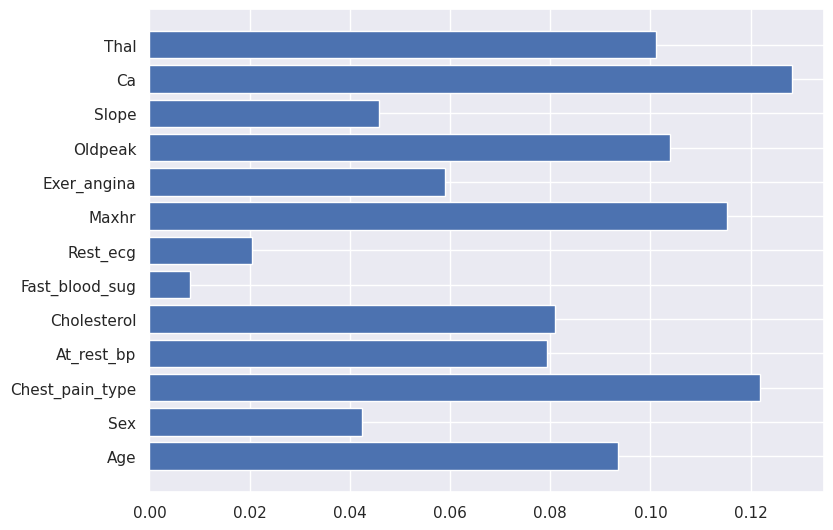

In [17]:
importance = rf.feature_importances_
# summarize feature importance
print(importance)
from matplotlib import pyplot
pyplot.barh([x for x in range(len(importance))], importance, tick_label = columns[:-1], )
pyplot.show()

### **Question 12**

Which are the three features (variables) with the highest importance?

**Question 12 answer:**

1.   List item
2.   List item
3.   List item




###**Question 13** 
Do the features that were important in the decision tree we made earlier have high feature importace? 

**Question 13 answer:**

###**Question 14** 
Now that you have experimented with two machine learning models, which model would you consider using for data analysis that is of your interest in your job or school projects? 

**Question 14 answer:**

# 🙂 Congratulations! You are learning a second machine learning model. You might feel more familiarized with the steps to follow to build machine learning models now, if not, don't worry there are other notebooks.